In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="ticks")

In [2]:
GTC_DATA_DIR = "/gws/nopw/j04/ai4er/users/pn341/earthquake-predictability/data/gtc_quakes_data"
LABQUAKES_DATA_DIR = f"{GTC_DATA_DIR}/labquakes"
MELEVEEDU_DATA_DIR = f"{LABQUAKES_DATA_DIR}/MeleVeeduetal2020"

In [3]:
b698_FILE_PATH = f"{MELEVEEDU_DATA_DIR}/b698/b698.txt"
with open(b698_FILE_PATH, "r") as file:
    lines = [next(file) for _ in range(10)]
print("".join(lines))

#  Rec lp_disp       LT            Tau            SigN          dcdtOB slip   Time          Rec       	  timedcdt      ec_disp        mu   	     Shear_Strain   Slip velocity
#   .  micro-metre   mm            MPa            MPa           micro-metre   sec           .             sec           mm             .             .      	    mic_s-1
    0  0.0000000000  3.1636940114  -0.0000000000  0.0000001000  0.0000000000  0.0000000000  0.0000000000  -0.1000000000  0.0000000000  -0.0000000000  0.0000000000  0.0000000000
    1  0.0000000000  3.1636930114  -0.0000000000  0.0000001000  0.0000000000  1.0000000000  1.0000000000  0.9000000000  0.0000000000  -0.0000000000  0.0000000000  0.0000000000
    2  0.0000000000  3.1636935114  -0.0000000000  0.0000001000  0.0000000000  2.0000000000  2.0000000000  1.9000000000  0.0000000000  -0.0000000000  0.0000000000  0.0000000000
    3  0.0000000000  3.1636940114  -0.0000000000  0.0000001000  0.0000000000  3.0000000000  3.0000000000  2.9000000000  0.000000

In [4]:
with open(b698_FILE_PATH, "r") as file:
    df = pd.read_csv(file, delim_whitespace=True, skiprows=1)

df.columns = [
    "id",
    "lp_disp",
    "lt",
    "tau",
    "sign",
    "dcdtOB",
    "slip",
    "time",
    "rec",
    "timedcdt",
    "ec_disp",
    "mu",
    "shear_strain",
    "slip_velocity",
]

df = df.drop(["id"], axis=1)

In [5]:
df

,lp_disp,lt,tau,sign,dcdtOB,slip,time,rec,timedcdt,ec_disp,mu,shear_strain,slip_velocity
0,0.000,3.163694,-0.000000,1.000000e-07,0.000000,0.00,0.0,-0.10,0.000000,-0.000000,0.000000,0.0,NaN
1,0.000,3.163693,-0.000000,1.000000e-07,0.000000,1.00,1.0,0.90,0.000000,-0.000000,0.000000,0.0,NaN
2,0.000,3.163694,-0.000000,1.000000e-07,0.000000,2.00,2.0,1.90,0.000000,-0.000000,0.000000,0.0,NaN
3,0.000,3.163694,-0.000000,1.000000e-07,0.000000,3.00,3.0,2.90,0.000000,-0.000000,0.000000,0.0,NaN
4,0.000,3.163696,-0.000000,1.000000e-07,0.000000,4.00,4.0,3.90,0.000000,-0.000000,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145640,29315.416,0.331878,11.162863,1.736714e+01,11548.532363,12020.96,145640.0,12020.86,29.219844,0.642758,42.751509,-0.0,NaN
145641,29316.247,0.331792,11.167699,1.738535e+01,11548.532363,12020.97,145641.0,12020.87,29.220634,0.642363,42.753888,-0.0,NaN
145642,29315.335,0.331838,11.159968,1.737561e+01,11548.532363,12020.98,145642.0,12020.88,29.219788,0.642278,42.751339,-0.0,NaN
145643,29315.843,0.331909,11.165887,1.738213e+01,11548.532363,12020.99,145643.0,12020.89,29.220245,0.642378,42.752717,-0.0,NaN


In [6]:
subset_df = df[(df["time"] >= 80000) & (df["time"] <= 85000)].copy()

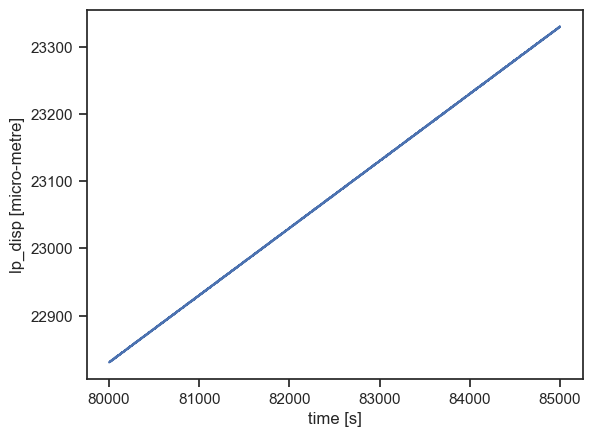

In [7]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="lp_disp")
plt.xlabel("time [s]")
plt.ylabel("lp_disp [micro-metre]")
plt.show();

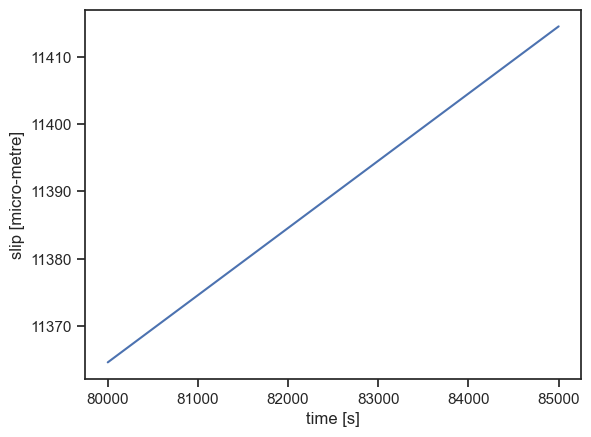

In [8]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="slip")
plt.xlabel("time [s]")
plt.ylabel("slip [micro-metre]")
plt.show();

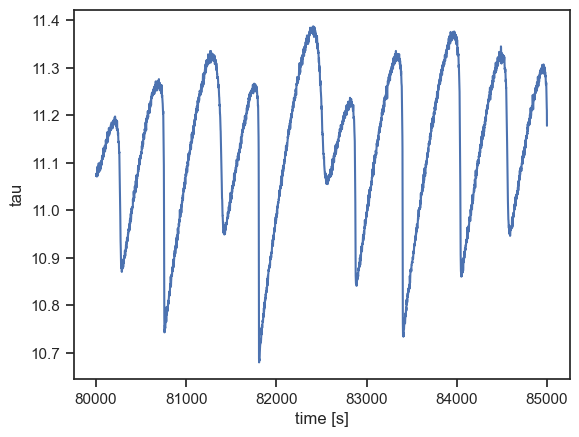

In [9]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="tau")
plt.xlabel("time [s]")
plt.ylabel("tau")
plt.show();